In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, cross_val_predict
import statsmodels.formula.api as smf

In [101]:
#https://www.kaggle.com/thansnet/phone-datas
df = pd.read_csv('phone_data.csv')
df.columns

Index(['index', 'date', 'duration', 'item', 'month', 'network',
       'network_type'],
      dtype='object')

In [102]:
#date is currently a string, convert that to day/hour/minute columns
df['dateobj'] = [datetime.datetime.strptime(x, "%d/%m/%y %H:%M") for x in df.date]
df['hour'] = [x.hour for x in df.dateobj]
df['day'] = [x.day for x in df.dateobj]
df['min'] = [x.minute for x in df.dateobj]
df = df.drop('index', axis=1)

In [103]:
df.head()

,date,duration,item,month,network,network_type,dateobj,hour,day,min
0,15/10/14 06:58,34.429,data,2014-11,data,data,2014-10-15 06:58:00,6,15,58
1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile,2014-10-15 06:58:00,6,15,58
2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile,2014-10-15 14:46:00,14,15,46
3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile,2014-10-15 14:48:00,14,15,48
4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile,2014-10-15 17:27:00,17,15,27


In [104]:
df.corr()

,duration,hour,day,min
duration,1.000000,0.067167,-0.043015,-0.049167
hour,0.067167,1.000000,-0.006519,-0.382427
day,-0.043015,-0.006519,1.000000,-0.025901
min,-0.049167,-0.382427,-0.025901,1.000000


# Can I predict the time spent on the phone using just the hour of the day?

In [105]:
regr = linear_model.LinearRegression()
x = df.hour
y = df.duration
regr.fit(pd.DataFrame(x),y)
scores = cross_val_score(regr,pd.DataFrame(x),y,cv=10)
print("Fold Scores: ",scores)
print("\nAverage Score: ",np.mean(scores))
print('\nCoefficients:', regr.coef_)
print('\nIntercept: \n', regr.intercept_)

Fold Scores:  [-0.01166309  0.02725331 -0.13779291  0.01451789  0.01894299 -0.10145193
 -0.01963371  0.02874944  0.01680912 -0.01175392]

Average Score:  -0.017602281047932388

Coefficients: [5.43701767]

Intercept: 
 46.238472291255434


In [106]:
#statsmodels
linear_formula = 'duration ~ hour'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.752
Date:                Thu, 27 Dec 2018   Prob (F-statistic):             0.0531
Time:                        16:51:53   Log-Likelihood:                -6235.1
No. Observations:                 830   AIC:                         1.247e+04
Df Residuals:                     828   BIC:                         1.248e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.2385     40.022      1.155      0.248     -32.319     124.796
hour           5.4370      2.807      1.937      0.053      -0.072      10.946
==============================================================================
Omnibus:                     1743.696   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4736876.732
Skew:                          16.480   Prob(JB):                         0.00
Kurtosis:                     371.624   Cond. No.                         37.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# What about just typical <=30 minute conversations?

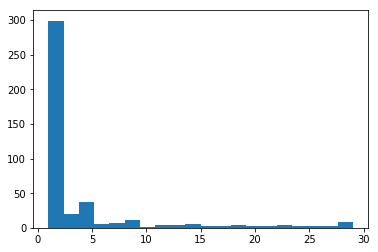

In [123]:
plt.hist(df[df.duration<30]['duration'], bins=20)
plt.show()

In [124]:
#let's limit to calls under 1 hours
df = df[df.duration<30]
print(df.shape)

(428, 10)


In [125]:
df.corr()

,duration,hour,day,min
duration,1.000000,0.000268,0.008798,0.085865
hour,0.000268,1.000000,-0.068341,-0.042568
day,0.008798,-0.068341,1.000000,-0.009164
min,0.085865,-0.042568,-0.009164,1.000000


In [126]:
linear_formula = 'duration ~ hour+min'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.582
Date:                Thu, 27 Dec 2018   Prob (F-statistic):              0.207
Time:                        16:55:11   Log-Likelihood:                -1395.1
No. Observations:                 428   AIC:                             2796.
Df Residuals:                     425   BIC:                             2808.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9159      1.059      2.752      0.006       0.833       4.998
hour           0.0048      0.059      0.081      0.935      -0.111       0.120
min            0.0317      0.018      1.779      0.076      -0.003       0.067
==============================================================================
Omnibus:                      236.323   Durbin-Watson:                   1.674
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1076.055
Skew:                           2.564   Prob(JB):                    2.18e-234
Kurtosis:                       8.834   Cond. No.                         123.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

It feels intuitively that there should be some pattern here, but there's too many outliers in this dataset, it's a poisson distribution, and also there's not really that many samples. Neither of our p-values leave me confident that there's no pattern here.